In [1]:
import numpy as np
from numpy import array,shape,transpose,dot
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
x=array([[21,18],[23,16],[22,21],[24,20],[19,22],[26,31],[27,40],[29,39],[18,18],[20,18],[30,38],[26,21],[28,23],[28,20],[30,24],[29,23]])
y=array([[0,0,0,1,0,1,1,1,0,0,1,2,2,2,2,2]])
y=transpose(y)
print x,'\n',shape(x),'\n',y,'\n',shape(y)

[[21 18]
 [23 16]
 [22 21]
 [24 20]
 [19 22]
 [26 31]
 [27 40]
 [29 39]
 [18 18]
 [20 18]
 [30 38]
 [26 21]
 [28 23]
 [28 20]
 [30 24]
 [29 23]] 
(16, 2) 
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]] 
(16, 1)


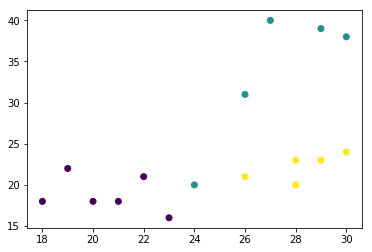

In [161]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [162]:
x=array([[1,21,18],[1,23,16],[1,22,21],[1,24,20],[1,19,22],[1,26,31],[1,27,40],[1,29,39],[1,18,18],[1,20,18],[1,30,38],[1,26,21],[1,28,23],[1,28,20],[1,30,24],[1,29,23]])
print x

[[ 1 21 18]
 [ 1 23 16]
 [ 1 22 21]
 [ 1 24 20]
 [ 1 19 22]
 [ 1 26 31]
 [ 1 27 40]
 [ 1 29 39]
 [ 1 18 18]
 [ 1 20 18]
 [ 1 30 38]
 [ 1 26 21]
 [ 1 28 23]
 [ 1 28 20]
 [ 1 30 24]
 [ 1 29 23]]


In [163]:
def prob(y):
    m=np.shape(y)[0]#no of trainning set
    prob=np.empty([m,3])
    k=0
    for i in range(0,3):
        for j in range(0,m):
            if(y[j] == k):
                prob[j][i]=1
            else:
                prob[j][i]=0
        k=k+1
    
    return prob

In [164]:
print prob(y)

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


In [297]:

def hypothesis(x,y):
    n=np.shape(x)[1]#no of parameter
    m=np.shape(x)[0]#no of trainning set
    pro=prob(y)
    t=np.zeros((n,3))
    for i in range(0,50000):
        nu=np.exp(-(dot(x,t)))
        de=transpose(array([[sum(nu[i]) for i in range(m)]]))
        log=nu/de
        l=pro-log
        s=dot(transpose(x),l)
        #l=dot(transpose(x),s)
        t=t - ((0.5 * s)/(m))
    
    return t
    

In [298]:
k=hypothesis(x,y)
print k,'\n',k[2][0]

[[ -4.42795160e+02   1.30703432e+02   3.12091728e+02]
 [  1.79961612e+01   4.56187476e+00  -2.25580359e+01]
 [  4.20455056e-01  -1.24773564e+01   1.20569013e+01]] 
0.420455055623


In [299]:

def pred(x):
    l=dot(transpose(k),x)
    l=np.exp(l)
    su=0
    for i in range(0,3):
        su=su+l[i]
    
    return l/su

In [303]:
print pred([[1],[25],[20]])

[[  9.99999998e-01]
 [  1.50451440e-09]
 [  4.02251884e-12]]


In [301]:
def line1(x):
    return (-(k[0][0] + (k[1][0]*x))) / k[2][0]

def line2(x):
    return (-(k[0][1] + (k[1][1]*x))) / k[2][1]

def line3(x):
    return (-(k[0][2] + (k[1][2]*x))) / k[2][2]

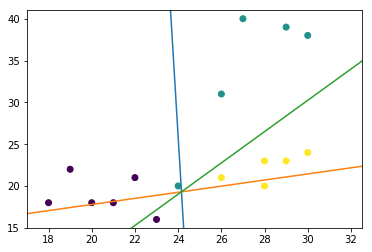

In [302]:
plt.scatter(x[:,1],x[:,2],c=y)
xx=np.linspace(15,35)
plt.axis([17,32.5,15,41])
yy=line1(xx.reshape(xx.shape[0],1))
yyy=line2(xx.reshape(xx.shape[0],1))
yyyy=line3(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)
plt.plot(xx,yyy)
plt.plot(xx,yyyy)
plt.show()

In [293]:
a=array([[4,6,2],[6,12,18],[2,4,8]])
b=array([[2],[6],[2]])
print a,'\n',b

[[ 4  6  2]
 [ 6 12 18]
 [ 2  4  8]] 
[[2]
 [6]
 [2]]


In [294]:
c=a/b
print c,'\n'
print [sum(c[i]) for i in range(3)]
s=array([[sum(c[i]) for i in range(3)]])
print transpose(s)

[[2 3 1]
 [1 2 3]
 [1 2 4]] 

[6, 6, 7]
[[6]
 [6]
 [7]]


In [39]:
s=transpose(s)
print s

[[6]
 [6]
 [7]]


In [49]:
su=[for i in range(0,2)]
print su

[6, 6]
